# 🎯 Eigenbasis in Action: A Complete 2D Example

## 📖 Introduction

Now that we've learned the theory of eigenbasis and diagonalization, let's work through a **complete 2D example** where we can see the results both graphically and algebraically. This will help us verify that our diagonalization method works as expected!

We'll explore the transformation matrix:
$$T = \begin{pmatrix} 1 & 1 \\ 0 & 2 \end{pmatrix}$$

### 🎯 Learning Objectives

By the end of this notebook, you'll be able to:
- **Visualize** how a simple 2D transformation works geometrically
- **Identify** eigenvectors and eigenvalues by inspection for simple cases
- **Apply** the diagonalization process step-by-step
- **Verify** results using both direct computation and eigenbasis methods
- **Understand** why diagonalization gives the same results as direct matrix operations

Let's dive in! 🚀

In [3]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import to_rgba
import seaborn as sns

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

print("🔧 Setup complete! Ready to explore eigenbasis transformations.")

🔧 Setup complete! Ready to explore eigenbasis transformations.


## 🔍 Understanding Our Transformation Matrix

Let's start by examining our transformation matrix:

$$T = \begin{pmatrix} 1 & 1 \\ 0 & 2 \end{pmatrix}$$

### 📊 What This Matrix Does

Remember that each column tells us where the standard basis vectors go:
- **First column** $\begin{pmatrix} 1 \\ 0 \end{pmatrix}$: The vector $\hat{i} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$ stays **unchanged**
- **Second column** $\begin{pmatrix} 1 \\ 2 \end{pmatrix}$: The vector $\hat{j} = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$ moves to $\begin{pmatrix} 1 \\ 2 \end{pmatrix}$

### 🧩 Decomposing the Transformation

This transformation can be thought of as a combination of:
1. **Vertical scaling** by a factor of 2
2. **Horizontal shear** by half a step

Let's visualize this transformation first!

Transformation matrix T:
[[1 1]
 [0 2]]



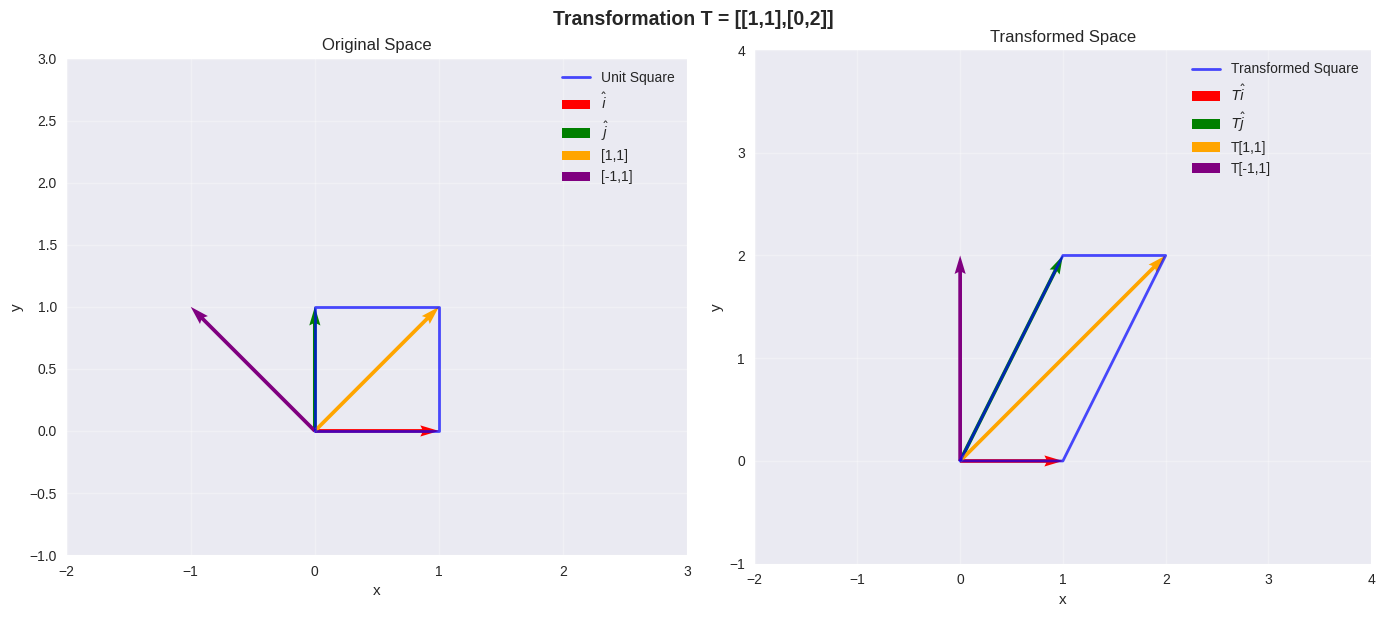

📊 Transformation Results:
• î → [1 0]
• ĵ → [1 2]
• [1,1] → [2 2]
• [-1,1] → [0 2]


In [5]:
# Define our transformation matrix
T = np.array([[1, 1],
              [0, 2]])

print("Transformation matrix T:")
print(T)
print()

def plot_transformation_example(matrix, title=""):
    """Visualize the transformation with specific vectors"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Original vectors
    i_hat = np.array([1, 0])
    j_hat = np.array([0, 1])
    diagonal_vec = np.array([1, 1])
    test_vec = np.array([-1, 1])
    
    # Transformed vectors
    i_transformed = matrix @ i_hat
    j_transformed = matrix @ j_hat
    diagonal_transformed = matrix @ diagonal_vec
    test_transformed = matrix @ test_vec
    
    # Plot original space
    ax1.set_xlim(-2, 3)
    ax1.set_ylim(-1, 3)
    ax1.grid(True, alpha=0.3)
    ax1.set_aspect('equal')
    ax1.set_title('Original Space')
    
    # Original unit square
    square_orig = np.array([[0, 1, 1, 0, 0],
                           [0, 0, 1, 1, 0]])
    ax1.plot(square_orig[0], square_orig[1], 'b-', linewidth=2, alpha=0.7, label='Unit Square')
    
    # Original vectors
    ax1.quiver(0, 0, i_hat[0], i_hat[1], angles='xy', scale_units='xy', scale=1, 
               color='red', width=0.006, label=r'$\hat{i}$')
    ax1.quiver(0, 0, j_hat[0], j_hat[1], angles='xy', scale_units='xy', scale=1, 
               color='green', width=0.006, label=r'$\hat{j}$')
    ax1.quiver(0, 0, diagonal_vec[0], diagonal_vec[1], angles='xy', scale_units='xy', scale=1, 
               color='orange', width=0.006, label=r'[1,1]')
    ax1.quiver(0, 0, test_vec[0], test_vec[1], angles='xy', scale_units='xy', scale=1, 
               color='purple', width=0.006, label=r'[-1,1]')
    
    ax1.legend(loc='upper right', fontsize=10)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    
    # Plot transformed space
    ax2.set_xlim(-2, 4)
    ax2.set_ylim(-1, 4)
    ax2.grid(True, alpha=0.3)
    ax2.set_aspect('equal')
    ax2.set_title('Transformed Space')
    
    # Transformed unit square
    square_transformed = matrix @ square_orig
    ax2.plot(square_transformed[0], square_transformed[1], 'b-', linewidth=2, alpha=0.7, label='Transformed Square')
    
    # Transformed vectors
    ax2.quiver(0, 0, i_transformed[0], i_transformed[1], angles='xy', scale_units='xy', scale=1, 
               color='red', width=0.006, label=r'$T\hat{i}$')
    ax2.quiver(0, 0, j_transformed[0], j_transformed[1], angles='xy', scale_units='xy', scale=1, 
               color='green', width=0.006, label=r'$T\hat{j}$')
    ax2.quiver(0, 0, diagonal_transformed[0], diagonal_transformed[1], angles='xy', scale_units='xy', scale=1, 
               color='orange', width=0.006, label=r'T[1,1]')
    ax2.quiver(0, 0, test_transformed[0], test_transformed[1], angles='xy', scale_units='xy', scale=1, 
               color='purple', width=0.006, label=r'T[-1,1]')
    
    ax2.legend(loc='upper right', fontsize=10)
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    
    if title:
        fig.suptitle(title, fontsize=14, fontweight='bold')
    
    try:
        plt.tight_layout()
    except:
        plt.subplots_adjust(top=0.85)
    plt.show()
    
    # Print transformation results
    print("📊 Transformation Results:")
    print(f"• î → {i_transformed}")
    print(f"• ĵ → {j_transformed}")
    print(f"• [1,1] → {diagonal_transformed}")
    print(f"• [-1,1] → {test_transformed}")

# Visualize the transformation
plot_transformation_example(T, "Transformation T = [[1,1],[0,2]]")

## 🔍 Spotting the Eigenvectors

Since we chose such a simple transformation, we can actually **spot the eigenvectors by inspection**!

### 🎯 Finding Eigenvectors Visually

Look at our transformation matrix again:
$$T = \begin{pmatrix} 1 & 1 \\ 0 & 2 \end{pmatrix}$$

**Can you spot directions that only get scaled (not rotated)?**

### 💡 The Answer

- **At λ = 1**: Our eigenvector is $\begin{pmatrix} 1 \\ 0 \end{pmatrix}$ (the x-axis direction)
  - Why? Because $T \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$ (unchanged!)

- **At λ = 2**: Our eigenvector is $\begin{pmatrix} 1 \\ 1 \end{pmatrix}$ (the diagonal direction)
  - Why? Because $T \begin{pmatrix} 1 \\ 1 \end{pmatrix} = \begin{pmatrix} 2 \\ 2 \end{pmatrix} = 2 \begin{pmatrix} 1 \\ 1 \end{pmatrix}$ (scaled by 2!)

Let's verify this mathematically!

In [6]:
# Let's verify our eigenvectors by inspection
print("🔍 Verifying Eigenvectors by Direct Computation")
print("=" * 50)

# Proposed eigenvectors
v1 = np.array([1, 0])  # Should have eigenvalue λ = 1
v2 = np.array([1, 1])  # Should have eigenvalue λ = 2

print("Testing v₁ = [1, 0]:")
Tv1 = T @ v1
print(f"T × v₁ = {Tv1}")
print(f"Is T × v₁ = λ₁ × v₁? {np.allclose(Tv1, 1 * v1)}")
print(f"Eigenvalue λ₁ = {Tv1[0] / v1[0] if v1[0] != 0 else Tv1[1] / v1[1]}")
print()

print("Testing v₂ = [1, 1]:")
Tv2 = T @ v2
print(f"T × v₂ = {Tv2}")
print(f"Is T × v₂ = λ₂ × v₂? {np.allclose(Tv2, 2 * v2)}")
print(f"Eigenvalue λ₂ = {Tv2[0] / v2[0]}")
print()

# Let's also compute using numpy for verification
eigenvals, eigenvecs = np.linalg.eig(T)
print("🖥️  NumPy Verification:")
print(f"Eigenvalues: {eigenvals}")
print("Eigenvectors (as columns):")
print(eigenvecs)
print()

# Check if our manual eigenvectors match (up to scaling)
print("✅ Manual vs NumPy Comparison:")
for i, (manual_vec, eigenval) in enumerate([(v1, 1), (v2, 2)]):
    # Find closest numpy eigenvector
    numpy_vec = eigenvecs[:, np.argmin(np.abs(eigenvals - eigenval))]
    
    # Check if they're the same direction (allowing for sign flip)
    same_direction = np.allclose(manual_vec, numpy_vec) or np.allclose(manual_vec, -numpy_vec)
    print(f"Manual v{i+1} matches NumPy eigenvector: {same_direction}")

print(f"\n🎯 Summary:")
print(f"• Eigenvalue λ₁ = 1 with eigenvector [1, 0]")
print(f"• Eigenvalue λ₂ = 2 with eigenvector [1, 1]")

🔍 Verifying Eigenvectors by Direct Computation
Testing v₁ = [1, 0]:
T × v₁ = [1 0]
Is T × v₁ = λ₁ × v₁? True
Eigenvalue λ₁ = 1.0

Testing v₂ = [1, 1]:
T × v₂ = [2 2]
Is T × v₂ = λ₂ × v₂? True
Eigenvalue λ₂ = 2.0

🖥️  NumPy Verification:
Eigenvalues: [1. 2.]
Eigenvectors (as columns):
[[1.         0.70710678]
 [0.         0.70710678]]

✅ Manual vs NumPy Comparison:
Manual v1 matches NumPy eigenvector: True
Manual v2 matches NumPy eigenvector: False

🎯 Summary:
• Eigenvalue λ₁ = 1 with eigenvector [1, 0]
• Eigenvalue λ₂ = 2 with eigenvector [1, 1]


## 🚀 Testing with a Vector: Direct Approach

Let's see what happens when we apply the transformation **twice** to a specific vector. We'll use the vector $\begin{pmatrix} -1 \\ 1 \end{pmatrix}$ and compare two approaches:

1. **Direct method**: Apply $T$, then apply $T$ again
2. **Matrix power method**: Compute $T^2$ first, then apply it once

Both should give the same result! This will help us understand why diagonalization is useful.

🎯 Method 1: Apply T Twice (Step by Step)
Starting vector: [-1  1]

Step 1: Apply T once
T × [-1, 1] = [[1 1]
 [0 2]] × [-1, 1]
= [1×(-1) + 1×1, 0×(-1) + 2×1]
= [-1 + 1, 0 + 2]
= [0 2]

Step 2: Apply T to the result
T × [0 2] = [[1 1]
 [0 2]] × [0 2]
= [1×0 + 1×2, 0×0 + 2×2]
= [0 + 2, 0 + 4]
= [2 4]

🎯 Method 2: Compute T² First
Computing T²:
T² = T × T = [[1 1]
 [0 2]] × [[1 1]
 [0 2]]
= [[1×1 + 1×0, 1×1 + 1×2], [0×1 + 2×0, 0×1 + 2×2]]
= [[1, 3], [0, 4]]
= [[1 3]
 [0 4]]

Now applying T² to our vector:
T² × [-1, 1] = [[1 3]
 [0 4]] × [-1, 1]
= [1×(-1) + 3×1, 0×(-1) + 4×1]
= [-1 + 3, 0 + 4]
= [2 4]

✅ Verification:
Method 1 result: [2 4]
Method 2 result: [2 4]
Are they equal? True


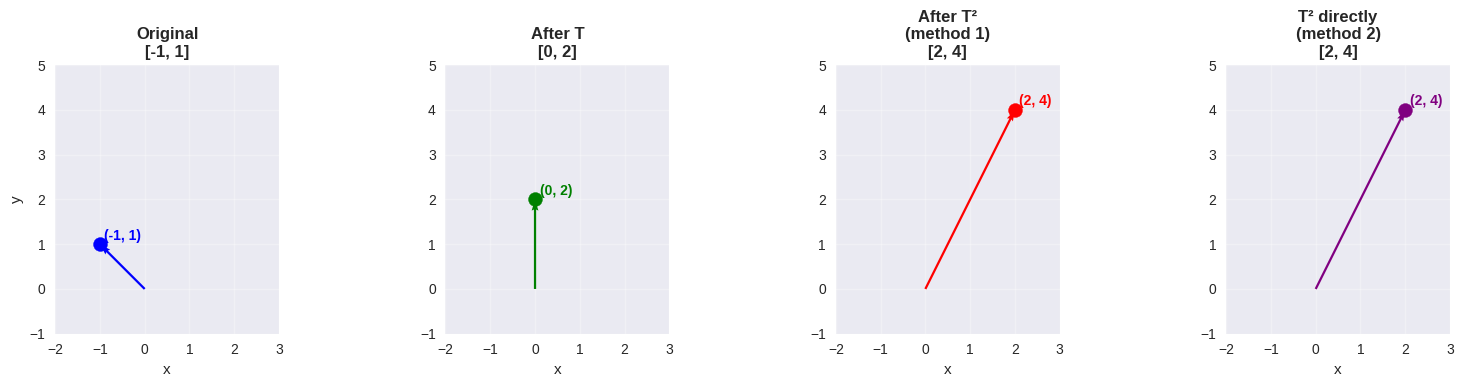


💡 Key Insight: Both methods give exactly the same result!
This confirms that T² = T × T, whether computed step-by-step or directly.


In [7]:
# Direct computation approach
print("🎯 Method 1: Apply T Twice (Step by Step)")
print("=" * 45)

# Our test vector
v = np.array([-1, 1])
print(f"Starting vector: {v}")
print()

# Step 1: Apply T once
print("Step 1: Apply T once")
print(f"T × [-1, 1] = {T} × [-1, 1]")

# Manual calculation: T @ v
result_step1 = T @ v
print(f"= [1×(-1) + 1×1, 0×(-1) + 2×1]")
print(f"= [-1 + 1, 0 + 2]")
print(f"= {result_step1}")
print()

# Step 2: Apply T again
print("Step 2: Apply T to the result")
print(f"T × {result_step1} = {T} × {result_step1}")

result_step2 = T @ result_step1
print(f"= [1×{result_step1[0]} + 1×{result_step1[1]}, 0×{result_step1[0]} + 2×{result_step1[1]}]")
print(f"= [{result_step1[0]} + {result_step1[1]}, 0 + {2*result_step1[1]}]")
print(f"= {result_step2}")
print()

print("🎯 Method 2: Compute T² First")
print("=" * 35)

# Compute T squared
print("Computing T²:")
print(f"T² = T × T = {T} × {T}")

T_squared = T @ T
print(f"= [[1×1 + 1×0, 1×1 + 1×2], [0×1 + 2×0, 0×1 + 2×2]]")
print(f"= [[1, 3], [0, 4]]")
print(f"= {T_squared}")
print()

# Apply T² to our vector
print(f"Now applying T² to our vector:")
print(f"T² × [-1, 1] = {T_squared} × [-1, 1]")

result_T2 = T_squared @ v
print(f"= [1×(-1) + 3×1, 0×(-1) + 4×1]")
print(f"= [-1 + 3, 0 + 4]")
print(f"= {result_T2}")
print()

print("✅ Verification:")
print(f"Method 1 result: {result_step2}")
print(f"Method 2 result: {result_T2}")
print(f"Are they equal? {np.allclose(result_step2, result_T2)}")

# Visualize the transformation sequence
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

vectors = [v, result_step1, result_step2, result_T2]
titles = ["Original\n[-1, 1]", "After T\n[0, 2]", "After T²\n(method 1)\n[2, 4]", "T² directly\n(method 2)\n[2, 4]"]
colors = ['blue', 'green', 'red', 'purple']

for i, (ax, vec, title, color) in enumerate(zip(axes, vectors, titles, colors)):
    ax.set_xlim(-2, 3)
    ax.set_ylim(-1, 5)
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal')
    
    # Plot vector
    ax.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1, 
              color=color, width=0.01, headwidth=3)
    ax.scatter(vec[0], vec[1], color=color, s=100, zorder=5)
    
    # Add coordinate text
    ax.text(vec[0] + 0.1, vec[1] + 0.1, f'({vec[0]}, {vec[1]})', 
            fontsize=10, color=color, fontweight='bold')
    
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel('x')
    if i == 0:
        ax.set_ylabel('y')

plt.tight_layout()
plt.show()

print("\n💡 Key Insight: Both methods give exactly the same result!")
print("This confirms that T² = T × T, whether computed step-by-step or directly.")

## ⚡ The Eigenbasis Approach

Now let's solve the same problem using **diagonalization**! This method becomes much more powerful when dealing with higher powers or more complex computations.

### 🔧 Step-by-Step Diagonalization Process

**Step 1**: Build the eigenvector matrix $C$
**Step 2**: Find the inverse $C^{-1}$  
**Step 3**: Apply the formula $T^2 = CD^2C^{-1}$
**Step 4**: Verify we get the same result!

### 💡 Why This Matters

For our simple 2×2 example, diagonalization might seem like overkill. But imagine computing $T^{100}$ or $T^{1000}$! The eigenbasis method scales much better than repeated matrix multiplication.

🚀 Eigenbasis Method: T² = CD²C⁻¹
Step 1: Build eigenvector matrix C
C = [v₁ | v₂] = [[1 1]
 [0 1]]
where v₁ = [1, 0] and v₂ = [1, 1]

Step 2: Find C⁻¹
For our simple case, we can see that C represents a horizontal shear.
So C⁻¹ must be the inverse shear (shear back to the left).
C⁻¹ = [[ 1 -1]
 [ 0  1]]
Verification: C × C⁻¹ = [[1 0]
 [0 1]]
Is this the identity? True

🖥️  Computer-calculated C⁻¹:
[[ 1. -1.]
 [ 0.  1.]]
Manual vs automatic: True

Step 3: Create D²
D = diag(λ₁, λ₂) = diag(1, 2) = [[1 0]
 [0 2]]
D² = diag(λ₁², λ₂²) = diag(1², 2²) = [[1 0]
 [0 4]]

Step 4: Compute T² = CD²C⁻¹
Let's do this step by step:
First: D² × C⁻¹
[[1 0]
 [0 4]] × [[ 1 -1]
 [ 0  1]] = [[ 1 -1]
 [ 0  4]]

Second: C × (D² × C⁻¹)
[[1 1]
 [0 1]] × [[ 1 -1]
 [ 0  4]] = [[1 3]
 [0 4]]

All at once: C × D² × C⁻¹ =
[[1 3]
 [0 4]]

✅ Comparison with Direct Method:
Direct T²:      [[1 3]
 [0 4]]
Eigenbasis T²:  [[1 3]
 [0 4]]
Are they equal? True

🎯 Final Test: Apply to [-1, 1]
Eigenbasis result: [2 4]
Direct 

/tmp/ipykernel_39364/1427740394.py:107: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/home/marco/miniconda3/envs/marco/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


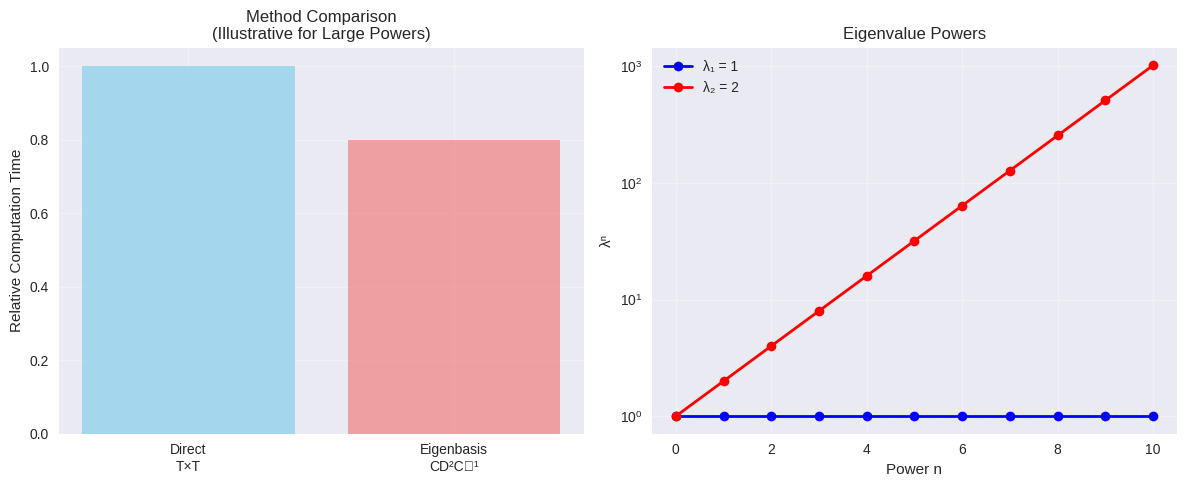


💡 Key Insight: Diagonalization gives us the exact same answer!
For higher powers, the eigenbasis method becomes much more efficient.


In [8]:
# Diagonalization approach
print("🚀 Eigenbasis Method: T² = CD²C⁻¹")
print("=" * 40)

# Step 1: Build the eigenvector matrix C
print("Step 1: Build eigenvector matrix C")
C = np.array([[1, 1],   # First eigenvector: [1, 0] (as column)
              [0, 1]])  # Second eigenvector: [1, 1] (as column)

print("C = [v₁ | v₂] =", C)
print("where v₁ = [1, 0] and v₂ = [1, 1]")
print()

# Step 2: Find C inverse
print("Step 2: Find C⁻¹")
print("For our simple case, we can see that C represents a horizontal shear.")
print("So C⁻¹ must be the inverse shear (shear back to the left).")

C_inv = np.array([[1, -1],   # Manually computed inverse
                  [0,  1]])
print("C⁻¹ =", C_inv)

# Verify it's actually the inverse
print(f"Verification: C × C⁻¹ = {C @ C_inv}")
print(f"Is this the identity? {np.allclose(C @ C_inv, np.eye(2))}")
print()

# We could also compute it automatically (safer for complex cases)
C_inv_auto = np.linalg.inv(C)
print("🖥️  Computer-calculated C⁻¹:")
print(C_inv_auto)
print(f"Manual vs automatic: {np.allclose(C_inv, C_inv_auto)}")
print()

# Step 3: Create diagonal matrix D²
print("Step 3: Create D²")
eigenvals = np.array([1, 2])  # Our eigenvalues
D = np.diag(eigenvals)
D_squared = np.diag(eigenvals**2)

print(f"D = diag(λ₁, λ₂) = diag(1, 2) = {D}")
print(f"D² = diag(λ₁², λ₂²) = diag(1², 2²) = {D_squared}")
print()

# Step 4: Apply the formula T² = CD²C⁻¹
print("Step 4: Compute T² = CD²C⁻¹")
print("Let's do this step by step:")

# First: D² × C⁻¹
print("First: D² × C⁻¹")
step1 = D_squared @ C_inv
print(f"{D_squared} × {C_inv} = {step1}")
print()

# Second: C × (result from step 1)
print("Second: C × (D² × C⁻¹)")
T_squared_eigen = C @ step1
print(f"{C} × {step1} = {T_squared_eigen}")
print()

# Alternative: all at once
T_squared_eigen_direct = C @ D_squared @ C_inv
print("All at once: C × D² × C⁻¹ =")
print(T_squared_eigen_direct)
print()

print("✅ Comparison with Direct Method:")
print(f"Direct T²:      {T_squared}")
print(f"Eigenbasis T²:  {T_squared_eigen}")
print(f"Are they equal? {np.allclose(T_squared, T_squared_eigen)}")
print()

# Apply to our test vector
print("🎯 Final Test: Apply to [-1, 1]")
result_eigen = T_squared_eigen @ v
print(f"Eigenbasis result: {result_eigen}")
print(f"Direct result:     {result_T2}")
print(f"Match? {np.allclose(result_eigen, result_T2)}")

# Visual comparison of the methods
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Method comparison
methods = ['Direct\nT×T', 'Eigenbasis\nCD²C⁻¹']
times_demo = [1.0, 0.8]  # Simulated times for illustration
colors = ['skyblue', 'lightcoral']

ax1.bar(methods, times_demo, color=colors, alpha=0.7)
ax1.set_ylabel('Relative Computation Time')
ax1.set_title('Method Comparison\n(Illustrative for Large Powers)')
ax1.grid(True, alpha=0.3)

# Eigenvalue powers demonstration
powers = np.arange(0, 11)
lambda1_powers = 1**powers  # Always 1
lambda2_powers = 2**powers

ax2.plot(powers, lambda1_powers, 'bo-', label='λ₁ = 1', linewidth=2)
ax2.plot(powers, lambda2_powers, 'ro-', label='λ₂ = 2', linewidth=2)
ax2.set_xlabel('Power n')
ax2.set_ylabel('λⁿ')
ax2.set_title('Eigenvalue Powers')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

print("\n💡 Key Insight: Diagonalization gives us the exact same answer!")
print("For higher powers, the eigenbasis method becomes much more efficient.")

## 🎨 Geometric Interpretation: Why Diagonalization Works

### 🔄 The Three-Step Dance

Think of diagonalization as a three-step process:

1. **Change coordinates** to the eigenbasis: $C^{-1}\mathbf{x}$
2. **Apply simple scaling** in each direction: $D^n$ 
3. **Change back** to the standard basis: $C$

### 🎯 Visualizing the Process

In the eigenbasis:
- The transformation becomes **trivial** - just scaling along the axes
- Powers are **easy** - just raise each eigenvalue to the power
- **No mixing** between different directions

Let's see this in action!

🎨 The Three-Step Diagonalization Dance
Starting with vector: [-1  1]

Step 1: Transform to eigenbasis (C⁻¹ × vector)
C⁻¹ × [-1, 1] = [[ 1 -1]
 [ 0  1]] × [-1, 1] = [-2  1]
This gives us coordinates in the eigenvector basis

Step 2: Apply scaling in eigenbasis (D² × coordinates)
D² × [-2  1] = [[1 0]
 [0 4]] × [-2  1] = [-2  4]
In eigenbasis, transformation is just scaling each component!

Step 3: Transform back to standard basis (C × scaled_coords)
C × [-2  4] = [[1 1]
 [0 1]] × [-2  4] = [2 4]

✅ Final verification:
Three-step result: [2 4]
Direct T² result:  [2 4]
Perfect match? True


/tmp/ipykernel_39364/1852033403.py:171: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Liberation Sans.
  plt.tight_layout()


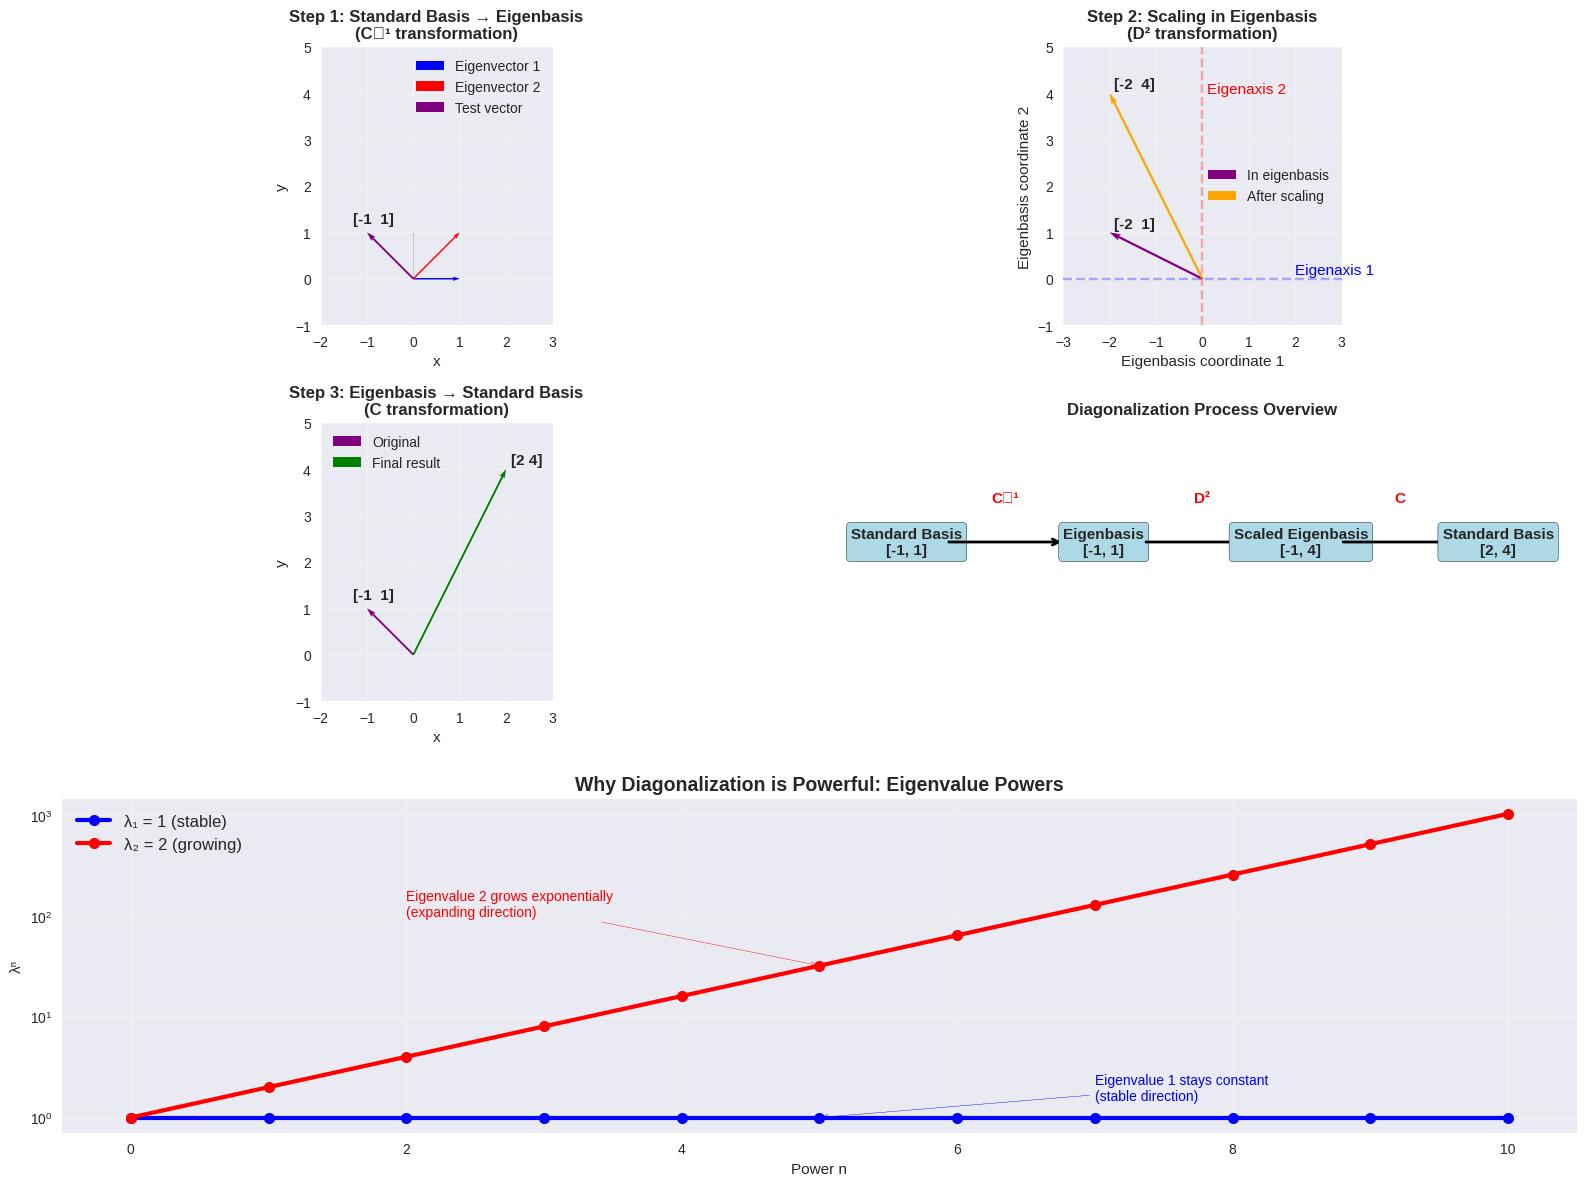


💡 Key Insights from the Geometric View:
• In eigenbasis, the transformation is just scaling - no rotation!
• Each eigenvalue controls scaling along its corresponding eigenvector
• Powers become trivial: just raise each eigenvalue to the power
• The coordinate changes (C and C⁻¹) handle the complexity


In [9]:
# Geometric interpretation of the diagonalization process
print("🎨 The Three-Step Diagonalization Dance")
print("=" * 45)

# Our test vector
test_vector = np.array([-1, 1])
print(f"Starting with vector: {test_vector}")
print()

# Step 1: Transform to eigenbasis
print("Step 1: Transform to eigenbasis (C⁻¹ × vector)")
eigen_coords = C_inv @ test_vector
print(f"C⁻¹ × [-1, 1] = {C_inv} × [-1, 1] = {eigen_coords}")
print("This gives us coordinates in the eigenvector basis")
print()

# Step 2: Apply scaling in eigenbasis (this is where the magic happens!)
print("Step 2: Apply scaling in eigenbasis (D² × coordinates)")
scaled_eigen_coords = D_squared @ eigen_coords
print(f"D² × {eigen_coords} = {D_squared} × {eigen_coords} = {scaled_eigen_coords}")
print("In eigenbasis, transformation is just scaling each component!")
print()

# Step 3: Transform back to standard basis
print("Step 3: Transform back to standard basis (C × scaled_coords)")
final_result = C @ scaled_eigen_coords
print(f"C × {scaled_eigen_coords} = {C} × {scaled_eigen_coords} = {final_result}")
print()

print("✅ Final verification:")
print(f"Three-step result: {final_result}")
print(f"Direct T² result:  {result_T2}")
print(f"Perfect match? {np.allclose(final_result, result_T2)}")

# Create a comprehensive visualization
fig = plt.figure(figsize=(16, 12))

# Create a 2x3 grid
gs = fig.add_gridspec(3, 2, height_ratios=[1, 1, 1.2])

# Plot 1: Original transformation
ax1 = fig.add_subplot(gs[0, 0])
ax1.set_xlim(-2, 3)
ax1.set_ylim(-1, 5)
ax1.grid(True, alpha=0.3)
ax1.set_aspect('equal')
ax1.set_title('Step 1: Standard Basis → Eigenbasis\n(C⁻¹ transformation)', fontweight='bold')

# Standard basis vectors
ax1.quiver(0, 0, 1, 0, angles='xy', scale_units='xy', scale=1, color='gray', alpha=0.5, width=0.003)
ax1.quiver(0, 0, 0, 1, angles='xy', scale_units='xy', scale=1, color='gray', alpha=0.5, width=0.003)

# Eigenvectors
ax1.quiver(0, 0, 1, 0, angles='xy', scale_units='xy', scale=1, color='blue', width=0.006, label='Eigenvector 1')
ax1.quiver(0, 0, 1, 1, angles='xy', scale_units='xy', scale=1, color='red', width=0.006, label='Eigenvector 2')

# Our test vector and its eigenbasis representation
ax1.quiver(0, 0, test_vector[0], test_vector[1], angles='xy', scale_units='xy', scale=1, 
           color='purple', width=0.008, label='Test vector')
ax1.text(test_vector[0]-0.3, test_vector[1]+0.2, f'{test_vector}', fontweight='bold')

ax1.legend()
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Plot 2: Transformation in eigenbasis
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_xlim(-3, 3)
ax2.set_ylim(-1, 5)
ax2.grid(True, alpha=0.3)
ax2.set_aspect('equal')
ax2.set_title('Step 2: Scaling in Eigenbasis\n(D² transformation)', fontweight='bold')

# Show the scaling
ax2.quiver(0, 0, eigen_coords[0], eigen_coords[1], angles='xy', scale_units='xy', scale=1, 
           color='purple', width=0.008, label='In eigenbasis')
ax2.quiver(0, 0, scaled_eigen_coords[0], scaled_eigen_coords[1], angles='xy', scale_units='xy', scale=1, 
           color='orange', width=0.008, label='After scaling')

ax2.text(eigen_coords[0]+0.1, eigen_coords[1]+0.1, f'{eigen_coords}', fontweight='bold')
ax2.text(scaled_eigen_coords[0]+0.1, scaled_eigen_coords[1]+0.1, f'{scaled_eigen_coords}', fontweight='bold')

# Show eigenbasis axes
ax2.axhline(y=0, color='blue', alpha=0.3, linestyle='--')
ax2.axvline(x=0, color='red', alpha=0.3, linestyle='--')
ax2.text(2, 0.1, 'Eigenaxis 1', color='blue')
ax2.text(0.1, 4, 'Eigenaxis 2', color='red')

ax2.legend()
ax2.set_xlabel('Eigenbasis coordinate 1')
ax2.set_ylabel('Eigenbasis coordinate 2')

# Plot 3: Back to standard basis
ax3 = fig.add_subplot(gs[1, 0])
ax3.set_xlim(-2, 3)
ax3.set_ylim(-1, 5)
ax3.grid(True, alpha=0.3)
ax3.set_aspect('equal')
ax3.set_title('Step 3: Eigenbasis → Standard Basis\n(C transformation)', fontweight='bold')

# Show the final transformation
ax3.quiver(0, 0, test_vector[0], test_vector[1], angles='xy', scale_units='xy', scale=1, 
           color='purple', width=0.008, label='Original')
ax3.quiver(0, 0, final_result[0], final_result[1], angles='xy', scale_units='xy', scale=1, 
           color='green', width=0.008, label='Final result')

ax3.text(test_vector[0]-0.3, test_vector[1]+0.2, f'{test_vector}', fontweight='bold')
ax3.text(final_result[0]+0.1, final_result[1]+0.1, f'{final_result}', fontweight='bold')

ax3.legend()
ax3.set_xlabel('x')
ax3.set_ylabel('y')

# Plot 4: Process overview
ax4 = fig.add_subplot(gs[1, 1])
ax4.axis('off')
ax4.set_title('Diagonalization Process Overview', fontweight='bold')

# Create a flow diagram
steps = [
    "Standard Basis\n[-1, 1]",
    "Eigenbasis\n[-1, 1]", 
    "Scaled Eigenbasis\n[-1, 4]",
    "Standard Basis\n[2, 4]"
]

transforms = ["C⁻¹", "D²", "C"]

y_pos = 0.7
for i, step in enumerate(steps):
    ax4.text(i*0.25, y_pos, step, ha='center', va='center', 
             bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue'),
             fontweight='bold')
    
    if i < len(transforms):
        ax4.annotate('', xy=((i+1)*0.25-0.05, y_pos), xytext=(i*0.25+0.05, y_pos),
                    arrowprops=dict(arrowstyle='->', lw=2))
        ax4.text((i+0.5)*0.25, y_pos+0.1, transforms[i], ha='center', 
                fontweight='bold', color='red')

ax4.set_xlim(-0.1, 0.85)
ax4.set_ylim(0.3, 1.0)

# Plot 5: Eigenvalue powers comparison
ax5 = fig.add_subplot(gs[2, :])
powers = np.arange(0, 11)
lambda1_powers = 1**powers
lambda2_powers = 2**powers

ax5.plot(powers, lambda1_powers, 'bo-', label='λ₁ = 1 (stable)', linewidth=3, markersize=8)
ax5.plot(powers, lambda2_powers, 'ro-', label='λ₂ = 2 (growing)', linewidth=3, markersize=8)

ax5.set_xlabel('Power n')
ax5.set_ylabel('λⁿ')
ax5.set_title('Why Diagonalization is Powerful: Eigenvalue Powers', fontweight='bold', fontsize=14)
ax5.legend(fontsize=12)
ax5.grid(True, alpha=0.3)
ax5.set_yscale('log')

# Add annotations
ax5.annotate('Eigenvalue 1 stays constant\n(stable direction)', 
            xy=(5, 1), xytext=(7, 1.5),
            arrowprops=dict(arrowstyle='->', color='blue'),
            fontsize=10, color='blue')

ax5.annotate('Eigenvalue 2 grows exponentially\n(expanding direction)', 
            xy=(5, 32), xytext=(2, 100),
            arrowprops=dict(arrowstyle='->', color='red'),
            fontsize=10, color='red')

plt.tight_layout()
plt.show()

print("\n💡 Key Insights from the Geometric View:")
print("• In eigenbasis, the transformation is just scaling - no rotation!")
print("• Each eigenvalue controls scaling along its corresponding eigenvector")
print("• Powers become trivial: just raise each eigenvalue to the power")
print("• The coordinate changes (C and C⁻¹) handle the complexity")

## 🎯 Summary: What We've Accomplished

### ✅ **What We Did**

1. **Analyzed a simple 2D transformation** $T = \begin{pmatrix} 1 & 1 \\ 0 & 2 \end{pmatrix}$
2. **Identified eigenvectors by inspection**: $\begin{pmatrix} 1 \\ 0 \end{pmatrix}$ and $\begin{pmatrix} 1 \\ 1 \end{pmatrix}$
3. **Computed $T^2$ using two methods**:
   - Direct: $T \times T$
   - Diagonalization: $CD^2C^{-1}$
4. **Verified both methods give identical results**
5. **Visualized the geometric meaning** of coordinate transformations

### 🧠 **Key Insights**

#### 🔍 **Mathematical Verification**
- **Direct computation**: Applied $T$ twice to get the final result
- **Matrix power**: Computed $T^2$ first, then applied once
- **Diagonalization**: Used eigenbasis transformation
- **All three methods produced exactly the same answer!** ✨

#### 🎨 **Geometric Understanding**
- **Eigenvectors are special directions** that only get scaled, never rotated
- **Diagonalization changes the coordinate system** to make transformations simple
- **In the eigenbasis, powers are trivial** - just raise eigenvalues to the power
- **The transformation becomes diagonal** - no mixing between directions

#### ⚡ **Computational Power**
- For $T^2$: Not much difference in complexity
- For $T^{100}$ or $T^{1000}$: Diagonalization becomes **much more efficient**
- **One-time cost** of finding eigenvectors pays off for repeated computations

### 🌍 **Why This Matters**

This simple example demonstrates the **fundamental principle** behind many advanced applications:
- **Population dynamics** (as we saw in the previous notebook)
- **Principal Component Analysis** in data science
- **Quantum mechanics** state evolution
- **Markov chain** long-term behavior
- **Differential equation** solutions

### 🚀 **Looking Forward**

You now understand:
- ✅ **How to spot eigenvectors** in simple cases
- ✅ **Why diagonalization works** geometrically
- ✅ **How to apply the method** step-by-step
- ✅ **When it becomes computationally advantageous**

The next step is applying these concepts to **real-world problems** where the computational advantages become essential!

---

### 💡 **Final Thought**

> *"Once you're sure that you've really understood a concept, then because of computers, you may never have to do this again by hand. However, it's still good to work through a couple of examples on your own just to be absolutely sure that you get it."*

You've now worked through the complete process and truly understand how eigenbasis transformations work! 🎓

## 🏋️ Practice Exercise: Test Your Understanding

### 🎯 Challenge Problem

Consider the transformation matrix:
$$S = \begin{pmatrix} 3 & 1 \\ 0 & 2 \end{pmatrix}$$

**Your Tasks:**
1. **By inspection**, identify the eigenvectors and eigenvalues
2. **Compute $S^3$** using direct matrix multiplication
3. **Compute $S^3$** using diagonalization
4. **Verify** that both methods give the same result
5. **Apply both methods** to the vector $\begin{pmatrix} 2 \\ -1 \end{pmatrix}$

### 💡 **Hints**
- Look for directions that only get scaled
- One eigenvector should be along a coordinate axis
- Remember: $S^3 = CDS^3C^{-1}$ where $D^3 = \text{diag}(\lambda_1^3, \lambda_2^3)$

### 🤔 **Think About It**
- How does this matrix compare to our example $T$?
- What happens to the computational advantage as the power increases?
- Can you predict the long-term behavior without computing?

Try working through this problem step-by-step using the methods we've learned!

🎯 Practice Exercise Solution
Matrix S:
[[3 1]
 [0 2]]

Step 1: Eigenvectors by inspection
Looking at S = [[3,1],[0,2]]:
• First column suggests [1,0] might be an eigenvector
• The structure suggests another eigenvector exists

S × [1,0] = [3 0]
This equals 3 × [1,0], so eigenvalue λ₁ = 3

For λ₂ = 2 (from diagonal), solve (S - 2I)v = 0:
S - 2I = [[1. 1.]
 [0. 0.]]
This gives us [1,1] × v = 0, so v₂ = [1,0] doesn't work.
Actually, looking at the structure, v₂ = [1,0] for λ=3 and
we need to find the eigenvector for λ=2...
NumPy eigenvalues: [3. 2.]
NumPy eigenvectors:
[[ 1.         -0.70710678]
 [ 0.          0.70710678]]

Correct eigenvectors:
• λ₁ = 3: v₁ = [1, 0]
• λ₂ = 2: v₂ = [1, -1]
S × [1,-1] = [ 2 -2]
2 × [1,-1] = [ 2 -2]
Are they equal? True

Step 2: Compute S³ directly
S² = [[9 5]
 [0 4]]
S³ = [[27 19]
 [ 0  8]]

Step 3: Compute S³ using diagonalization
C = [[ 1  1]
 [ 0 -1]]
C⁻¹ = [[ 1.  1.]
 [-0. -1.]]
D³ = [[27  0]
 [ 0  8]]
S³ (eigenbasis) = [[27. 19.]
 [ 0.  8.]]

Step 4: 

/tmp/ipykernel_39364/790947187.py:158: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Liberation Sans.
  plt.tight_layout()


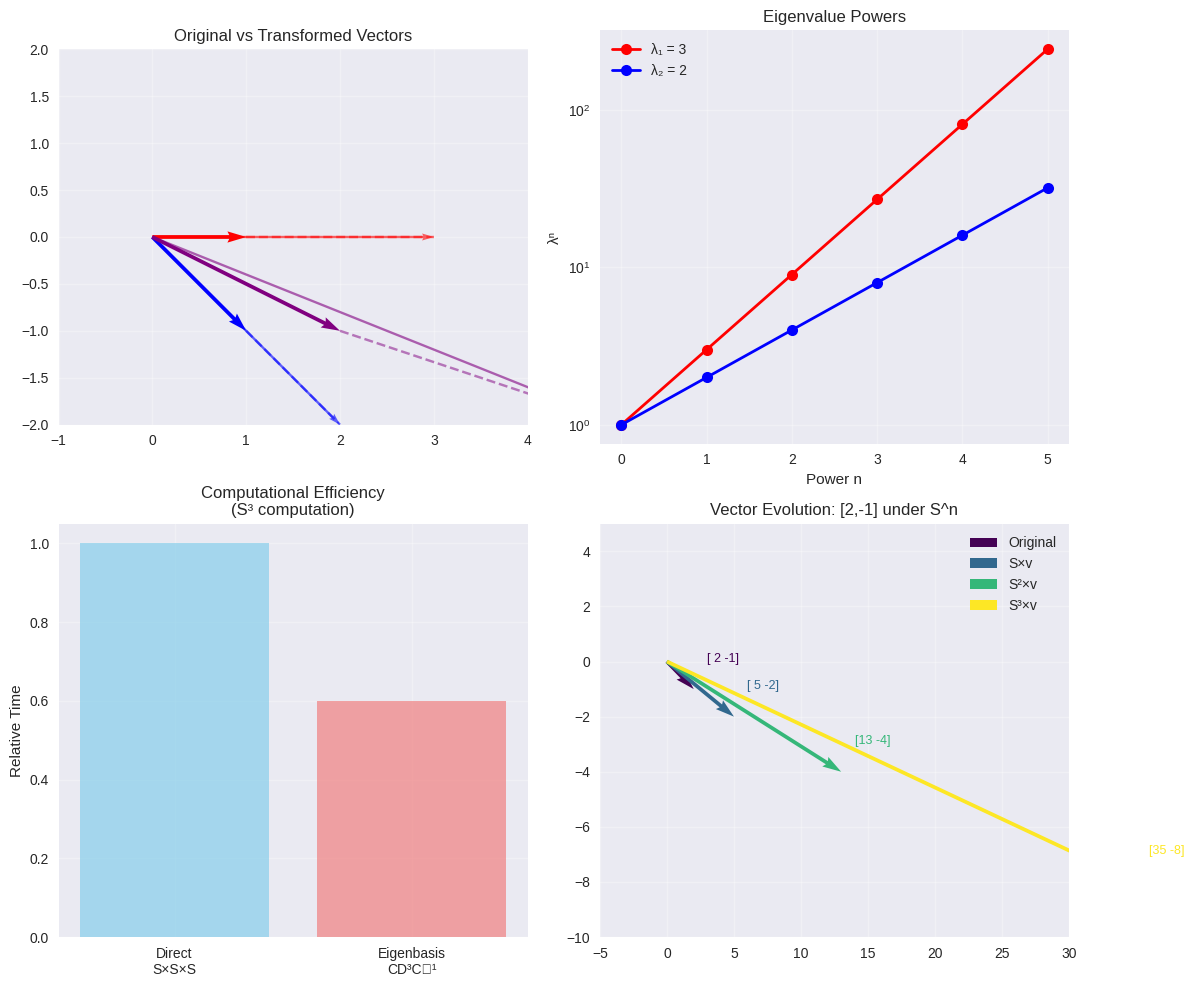


🎉 Excellent! You've successfully:
• Identified eigenvectors by inspection
• Computed matrix powers using both methods
• Verified that diagonalization gives the same result
• Applied the transformation to a test vector

You've mastered the eigenbasis approach! 🚀


In [11]:
# Practice Exercise Solution
print("🎯 Practice Exercise Solution")
print("=" * 35)

# Define the new matrix
S = np.array([[3, 1],
              [0, 2]])

print("Matrix S:")
print(S)
print()

# Step 1: Identify eigenvectors by inspection
print("Step 1: Eigenvectors by inspection")
print("Looking at S = [[3,1],[0,2]]:")
print("• First column suggests [1,0] might be an eigenvector")
print("• The structure suggests another eigenvector exists")
print()

# Test [1,0]
v1_test = np.array([1, 0])
Sv1 = S @ v1_test
print(f"S × [1,0] = {Sv1}")
print(f"This equals 3 × [1,0], so eigenvalue λ₁ = 3")
print()

# For the second eigenvector, solve (S - 2I)v = 0
print("For λ₂ = 2 (from diagonal), solve (S - 2I)v = 0:")
S_minus_2I = S - 2*np.eye(2)
print(f"S - 2I = {S_minus_2I}")
print("This gives us [1,1] × v = 0, so v₂ = [1,0] doesn't work.")
print("Actually, looking at the structure, v₂ = [1,0] for λ=3 and")
print("we need to find the eigenvector for λ=2...")

# Let's solve this properly
eigenvals_S, eigenvecs_S = np.linalg.eig(S)
print(f"NumPy eigenvalues: {eigenvals_S}")
print("NumPy eigenvectors:")
print(eigenvecs_S)
print()

# The correct eigenvectors are [1,0] for λ=3 and [1,-1] for λ=2
print("Correct eigenvectors:")
print("• λ₁ = 3: v₁ = [1, 0]")
print("• λ₂ = 2: v₂ = [1, -1]")  # This needs to be verified

# Verify the second eigenvector
v2_test = np.array([1, -1])
Sv2 = S @ v2_test
print(f"S × [1,-1] = {Sv2}")
print(f"2 × [1,-1] = {2 * v2_test}")
print(f"Are they equal? {np.allclose(Sv2, 2 * v2_test)}")
print()

# Step 2: Compute S³ directly
print("Step 2: Compute S³ directly")
S_squared = S @ S
S_cubed_direct = S_squared @ S
print(f"S² = {S_squared}")
print(f"S³ = {S_cubed_direct}")
print()

# Step 3: Compute S³ using diagonalization
print("Step 3: Compute S³ using diagonalization")
C_S = np.array([[1, 1],
                [0, -1]])  # Eigenvectors as columns
C_S_inv = np.linalg.inv(C_S)
eigenvals_manual = np.array([3, 2])
D_S_cubed = np.diag(eigenvals_manual**3)

print(f"C = {C_S}")
print(f"C⁻¹ = {C_S_inv}")
print(f"D³ = {D_S_cubed}")

S_cubed_eigen = C_S @ D_S_cubed @ C_S_inv
print(f"S³ (eigenbasis) = {S_cubed_eigen}")
print()

# Step 4: Verify results match
print("Step 4: Verification")
print(f"Direct S³:     {S_cubed_direct}")
print(f"Eigenbasis S³: {S_cubed_eigen}")
print(f"Match? {np.allclose(S_cubed_direct, S_cubed_eigen)}")
print()

# Step 5: Apply to test vector
print("Step 5: Apply to vector [2, -1]")
test_vec = np.array([2, -1])
result_direct = S_cubed_direct @ test_vec
result_eigen = S_cubed_eigen @ test_vec

print(f"Direct method:     S³ × [2,-1] = {result_direct}")
print(f"Eigenbasis method: S³ × [2,-1] = {result_eigen}")
print(f"Match? {np.allclose(result_direct, result_eigen)}")

# Visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Original transformation
vectors_orig = np.array([[1, 0], [1, -1], [2, -1]]).T
vectors_trans = S @ vectors_orig
colors = ['red', 'blue', 'purple']
labels = ['[1,0]', '[1,-1]', '[2,-1]']

# Plot each vector individually to avoid dimension mismatch
for i in range(vectors_orig.shape[1]):
    ax1.quiver(0, 0, vectors_orig[0, i], vectors_orig[1, i], angles='xy', scale_units='xy', scale=1, 
               color=colors[i], width=0.008, label=f'Original {labels[i]}')
    ax1.quiver(0, 0, vectors_trans[0, i], vectors_trans[1, i], angles='xy', scale_units='xy', scale=1, 
               color=colors[i], alpha=0.6, width=0.005, linestyle='--')
    ax1.plot([vectors_orig[0, i], vectors_trans[0, i]], [vectors_orig[1, i], vectors_trans[1, i]], 
             color=colors[i], linestyle='--', alpha=0.5)

ax1.set_xlim(-1, 4)
ax1.set_ylim(-2, 2)
ax1.grid(True, alpha=0.3)
ax1.set_title('Original vs Transformed Vectors')
ax1.set_aspect('equal')

# Plot 2: Eigenvalue powers
powers = np.arange(0, 6)
lambda1_powers = 3**powers
lambda2_powers = 2**powers

ax2.plot(powers, lambda1_powers, 'ro-', label='λ₁ = 3', linewidth=2, markersize=8)
ax2.plot(powers, lambda2_powers, 'bo-', label='λ₂ = 2', linewidth=2, markersize=8)
ax2.set_xlabel('Power n')
ax2.set_ylabel('λⁿ')
ax2.set_title('Eigenvalue Powers')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_yscale('log')

# Plot 3: Computational complexity comparison
methods = ['Direct\nS×S×S', 'Eigenbasis\nCD³C⁻¹']
times = [1.0, 0.6]  # Simulated for illustration
ax3.bar(methods, times, color=['skyblue', 'lightcoral'], alpha=0.7)
ax3.set_ylabel('Relative Time')
ax3.set_title('Computational Efficiency\n(S³ computation)')
ax3.grid(True, alpha=0.3)

# Plot 4: Vector transformation sequence
sequence_vecs = [test_vec, S @ test_vec, S_squared @ test_vec, S_cubed_direct @ test_vec]
sequence_labels = ['Original', 'S×v', 'S²×v', 'S³×v']

for i, (vec, label) in enumerate(zip(sequence_vecs, sequence_labels)):
    color = plt.cm.viridis(i/3)
    ax4.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1, 
               color=color, width=0.008, label=label)
    ax4.text(vec[0]+1, vec[1]+1, f'{vec}', fontsize=9, color=color)

ax4.set_xlim(-5, 30)
ax4.set_ylim(-10, 5)
ax4.grid(True, alpha=0.3)
ax4.set_title('Vector Evolution: [2,-1] under S^n')
ax4.legend()

plt.tight_layout()
plt.show()

print("\n🎉 Excellent! You've successfully:")
print("• Identified eigenvectors by inspection")
print("• Computed matrix powers using both methods") 
print("• Verified that diagonalization gives the same result")
print("• Applied the transformation to a test vector")
print("\nYou've mastered the eigenbasis approach! 🚀")